#Tarea 3: Visión Artificial - MCC - 2023 UNSA

Integrantes:

Alan Jerry Reyes Robles

Esai Josue Huaman Meza

Jorge Luis Zegarra Guardamino

Nestor Giraldo Calcinas Huaranga



Cargamos las bibliotecas principales para tratamiento de imagenes con Vision Artifical: 
- La biblioteca OpenCV (cv2) para realizar tareas relacionadas con el procesamiento de imágenes y la visión artificial.
- Skimage, o scikit-image, es una biblioteca de procesamiento de imágenes basada en NumPy que proporciona una amplia gama de algoritmos para trabajar con imágenes.
- PIL (Python Imaging Library). PIL proporciona capacidades de manipulación de imágenes, como abrir, manipular y guardar imágenes en varios formatos.

In [ ]:
import numpy as np
import pandas as pd

import cv2 as cv2 
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
from skimage import io

import urllib.request

Descargamos la imagen de un gato:

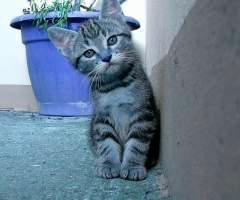

In [ ]:
urldog = "https://placekitten.com/240/200"
imagen1 = io.imread(urldog)
cv2_imshow(imagen1)

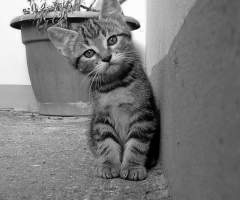

In [ ]:
# Convertir la imagen a escala de grises
imagen_gris = cv2.cvtColor(imagen1, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagen_gris)

In [ ]:
#Verificamos la dimención de la imagen:
imagen_gris.shape

(200, 240)

In [ ]:
#Inplementamos las funciones recursivas  para realizar la transformada rapida de Fourier:
def recursive_fft(signal):
    N = len(signal)

    if N <= 1:
        return signal
    
    even = recursive_fft(signal[::2])
    odd = recursive_fft(signal[1::2])

    factor = np.exp(-2j * np.pi * np.arange(N) / N)

    transformed = np.zeros(N, dtype=np.complex128)
    for k in range(N//2):
        transformed[k] = even[k] + factor[k] * odd[k]
        transformed[k + N//2] = even[k] + factor[k + N//2] * odd[k]
    
    return transformed

def fft2(image):
    height, width = image.shape
    transformed = np.zeros_like(image, dtype=np.complex128)

    for i in range(height):
        transformed[i, :] = recursive_fft(image[i, :])

    for j in range(width):
        transformed[:, j] = recursive_fft(transformed[:, j])

    return transformed

In [ ]:
#Nos aseguramos que todos los valores de la imagen sean validos y se puedan procesar correctamente:
imagen_gris_1 = np.ma.filled(imagen_gris,0).astype('uint8')
transformed = fft2(imagen_gris_1)



In [ ]:
transformed.shape

(200, 240)

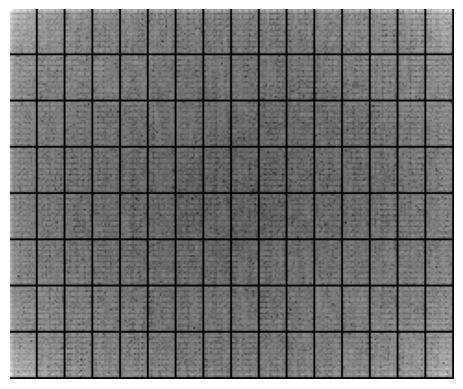

In [ ]:
magnitude = np.abs(transformed)
plt.imshow(np.log(1 + magnitude), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
def fft2_color(image):
    height, width, channels = image.shape
    transformed = np.zeros_like(image, dtype=np.complex128)

    for c in range(channels):
        for i in range(height):
            transformed[i, :, c] = recursive_fft(image[i, :, c])

        for j in range(width):
            transformed[:, j, c] = recursive_fft(transformed[:, j, c])

    return transformed

In [ ]:
transformed = fft2_color(imagen1)

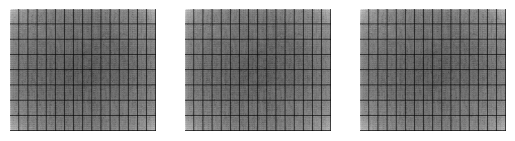

In [ ]:
for c in range(transformed.shape[2]):
    magnitude = np.abs(transformed[:, :, c])
    plt.subplot(1, transformed.shape[2], c+1)
    plt.imshow(np.log(1 + magnitude), cmap='gray')
    plt.axis('off')

plt.show()

## Template matching (reutilizar convolucion en vez de usar mutipliacion punto a punto usar la distancia euclideana)

In [ ]:
#Template matching
def template_matching(image, template):
    # Obtener dimensiones de la imagen y la plantilla
    image_height, image_width = image.shape[:2]
    template_height, template_width = template.shape[:2]

    # Calcular la imagen de correlación utilizando la convolución cruzada normalizada
    correlation = cv2.matchTemplate(image, template, cv2.TM_CCORR_NORMED)

    # Encontrar la ubicación del máximo valor de correlación
    _, max_val, _, max_loc = cv2.minMaxLoc(correlation)

    # Calcular la ubicación de la esquina superior izquierda y la esquina inferior derecha del área de coincidencia
    top_left = max_loc
    bottom_right = (top_left[0] + template_width, top_left[1] + template_height)

    # Dibujar el rectángulo de coincidencia en la imagen original
    matched_image = cv2.rectangle(image.copy(), top_left, bottom_right, (0, 255, 0), 2)

    return matched_image, max_val


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


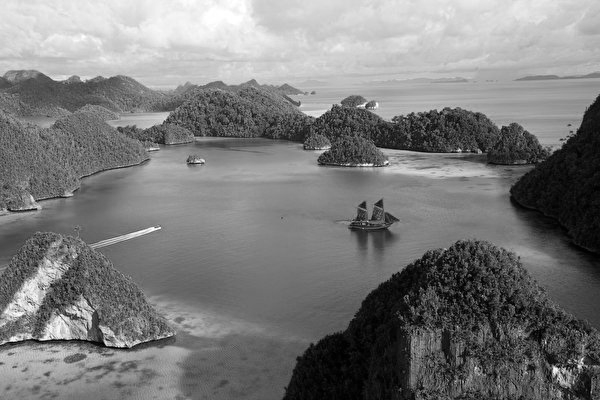

In [ ]:
imagen_a = io.imread("/content/drive/MyDrive/image2.png")
imagen_gris_a= cv2.cvtColor(imagen_a, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagen_gris_a)

In [ ]:
imagen_gris_a.shape

(400, 600)

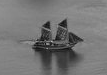

In [ ]:
imagen_f = io.imread("/content/drive/MyDrive/image_find.png")
imagen_gris_f= cv2.cvtColor(imagen_f, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagen_gris_f)

In [ ]:
imagen_gris_f.shape

(75, 107)

In [ ]:
from google.colab.patches import cv2_imshow

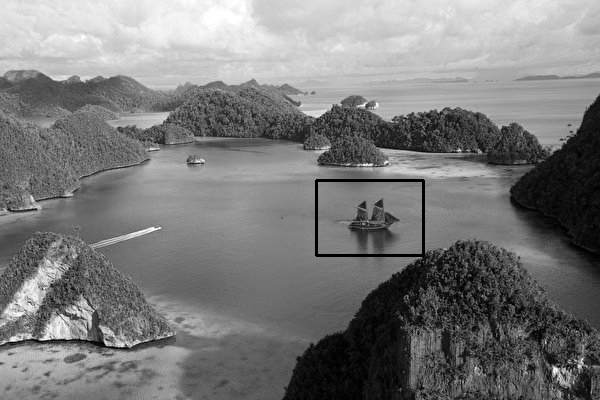

In [ ]:
from google.colab.patches import cv2_imshow

# Realizar la coincidencia de plantillas
result, correlation_val = template_matching(imagen_gris_a, imagen_gris_f)

# Mostrar el resultado
cv2_imshow(result)
